# Descripción del proyecto
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba.

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

# Instrucciones del proyecto
1. Descarga y prepara los datos.  Explica el procedimiento.
2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.
3. Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.
4. Realiza la prueba final.
5. Descripción de los datos
6. Puedes encontrar los datos en el archivo  /datasets/Churn.csv file. Descarga el conjunto de datos.

# Características

- RowNumber: índice de cadena de datos
- CustomerId: identificador de cliente único
- Surname: apellido
- CreditScore: valor de crédito
- Geography: país de residencia
- Gender: sexo
- Age: edad
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- Balance: saldo de la cuenta
- NumOfProducts: número de productos bancarios utilizados por el cliente
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
- EstimatedSalary: salario estimado

# Objetivo

- Exited: El cliente se ha ido (1 - sí; 0 - no)

In [1]:
# Manipulación y exploración de datos
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modelos de machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report

# Carga y preparación de datos

In [2]:
url = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_10/data/Churn.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,909
Balance,0
NumOfProducts,0


## Manejo de Valores Faltantes

Rellenar los valores faltantes en la columna 'Tenure' con la mediana para asegurar la integridad de los datos.


In [7]:
df['Tenure'].value_counts()

,count
Tenure,
1.0,952
2.0,950
8.0,933
3.0,928
5.0,927
7.0,925
4.0,885
9.0,882
6.0,881


In [8]:
df['Tenure'].describe()

,Tenure
count,9091.000000
mean,4.997690
std,2.894723
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,10.000000


In [9]:
mode_tenure = df['Tenure'].mode().values[0]
print(f"La moda de 'Tenure' es: {mode_tenure}")
df['Tenure'] = df['Tenure'].fillna(mode_tenure)
print(f"Valores faltantes en 'Tenure' después de rellenar: {df['Tenure'].isna().sum()}")

La moda de 'Tenure' es: 1.0
Valores faltantes en 'Tenure' después de rellenar: 0


In [10]:
df['Tenure'].value_counts()

,count
Tenure,
1.0,1861
2.0,950
8.0,933
3.0,928
5.0,927
7.0,925
4.0,885
9.0,882
6.0,881


## Estadísticas Descriptivas

Mostrar las estadísticas descriptivas de las columnas numéricas para comprender su distribución central, dispersión y forma.


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.634300,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.989725,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Análisis del Balance de Clases

Visualizar la distribución de la variable objetivo 'Exited' para verificar el equilibrio de clases, utilizando un gráfico de barras con leyendas claras.


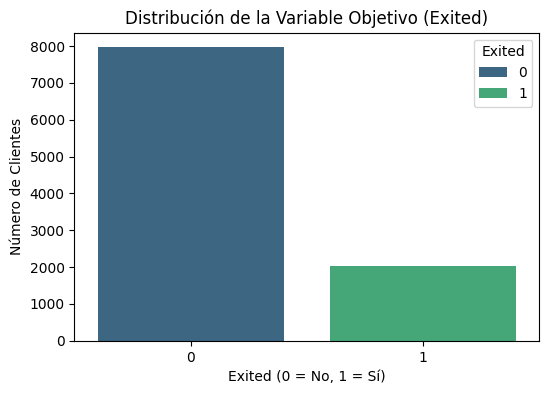

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='viridis', hue='Exited')
plt.title('Distribución de la Variable Objetivo (Exited)')
plt.xlabel('Exited (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.show()

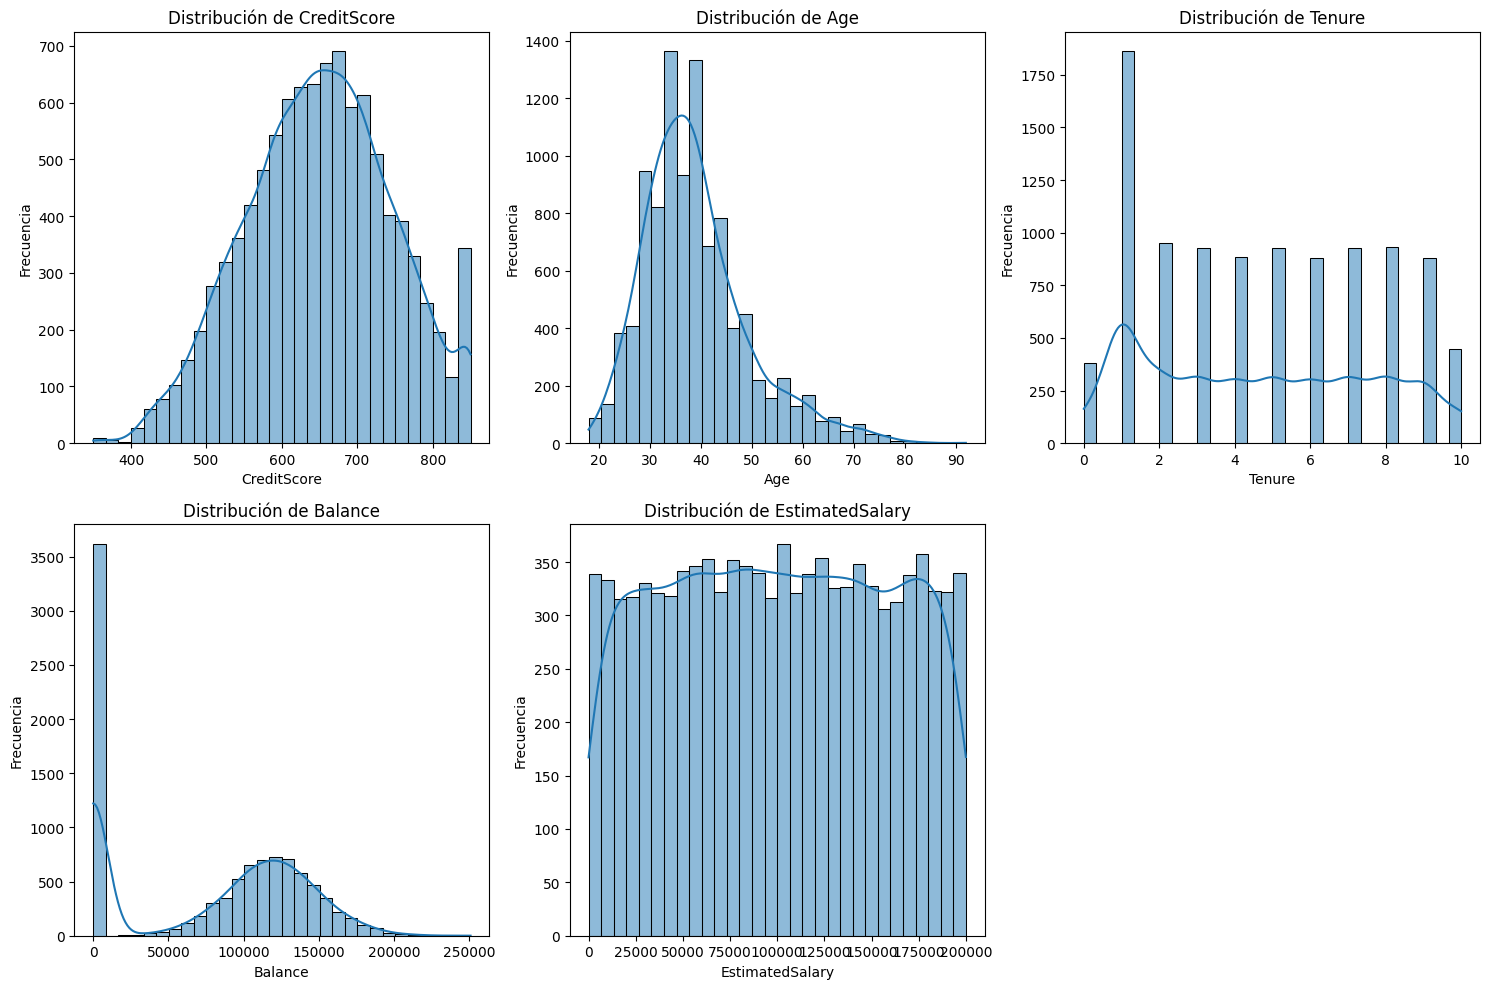

In [22]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


## Distribución de Variables Categóricas

Visualizar la distribución de las variables categóricas 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', y 'NumOfProducts' utilizando gráficos de barras para entender su composición.

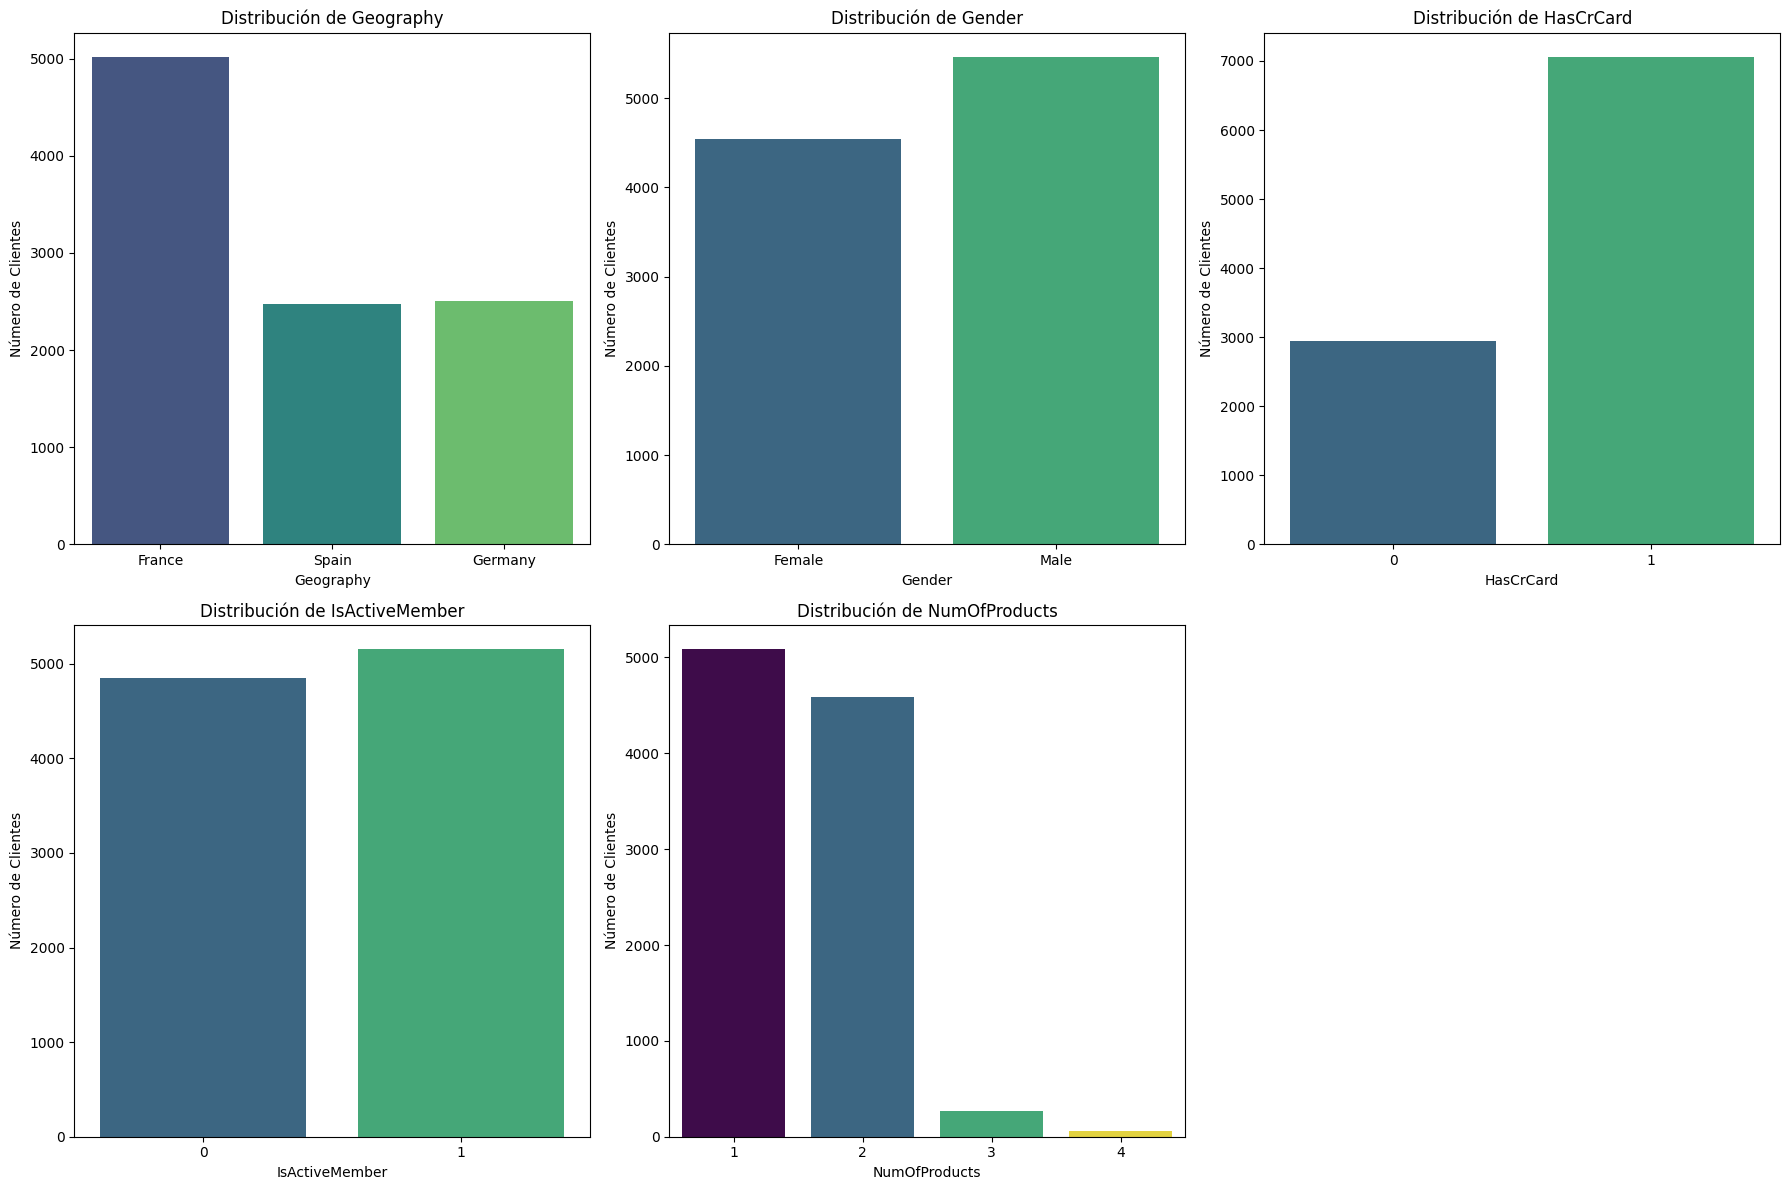

In [16]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.countplot(x=feature, data=df, palette='viridis', hue=feature, legend=False)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

## Matriz de Correlación

Calcular y visualizar la matriz de correlación entre las características numéricas, utilizando un mapa de calor para identificar relaciones y dependencias.

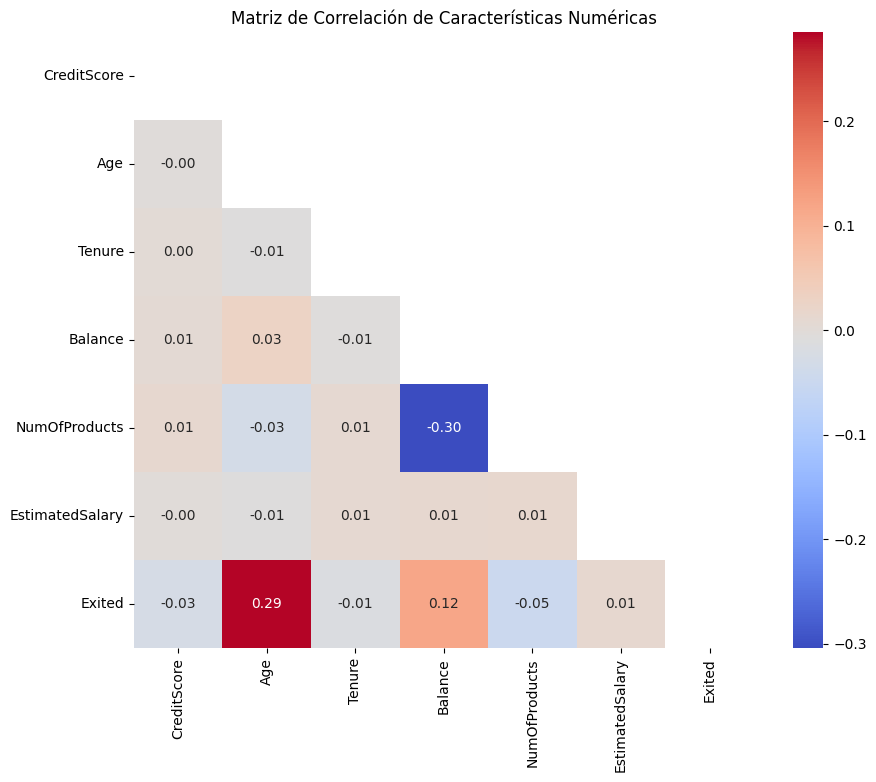

In [25]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
correlation_matrix = df[numerical_features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

## Resumen:

### Principales conclusiones del análisis de datos

*   **Tratamiento de datos faltantes**: Todos los valores faltantes en la columna «Antigüedad» se imputaron correctamente utilizando la mediana, lo que dio como resultado 0 valores faltantes restantes para esta característica.
*   **Estadísticas descriptivas**: Se calcularon las estadísticas descriptivas de todas las columnas numéricas, lo que proporcionó una visión general completa de su tendencia central, dispersión y forma.
*   **Distribución de la variable objetivo**: La columna «Salido» muestra un desequilibrio, con un número significativamente mayor de clientes que no salieron (Salido=0) en comparación con los que sí lo hicieron (Salido=1).
*   **Distribuciones de características numéricas**: Los histogramas revelaron las distribuciones de «Puntuación crediticia», «Edad», «Antigüedad», «Saldo» y «Salario estimado», mostrando patrones variables.
* **Distribuciones de características categóricas**: Los gráficos de barras de «Geografía», «Género», «TieneTarjetaCrédito», «EsMiembroActivo» y «NúmeroDeProductos» ilustraban sus respectivas frecuencias y distribuciones de categorías entre los clientes.
* **Correlaciones de características numéricas**: un mapa de calor de correlaciones indicaba las relaciones entre las características numéricas. Por ejemplo, «Age» y «Balance» muestran cierta correlación con «Exited», lo que sugiere que los clientes de más edad y aquellos con saldos más elevados podrían ser más propensos a darse de baja.

#